In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
from collections import OrderedDict

from models.seir.seir_testing import SEIR_Testing

In [3]:
# define SEIR model parameters (Gabriel Goh's version)
R0 = 2.2
T_inf = 2.9
T_trans = T_inf/R0
T_inc = 5.2
T_recov_mild = (14 - T_inf)
T_hosp = 5
T_recov_severe = (31.5 - T_inf)
T_death = 32
 
P_severe = 0.2
P_fatal = 0.02
P_mild = 1 - P_severe - P_fatal

N = 7e6
init_infected = 1.0

intervention_day = 100
intervention_amount = 3


# define testing related parameters
T_inf_detected = T_inf
T_trans_detected = T_trans
T_inc_detected = T_inc

P_mild_detected = P_mild
P_severe_detected = P_severe
P_fatal_detected = P_fatal

testing_rate_for_exposed = 0.1
positive_test_rate_for_exposed = 1
testing_rate_for_infected = 0.1
positive_test_rate_for_infected = 1
q = 0

vanilla_params = {
    'T_trans': T_trans,
    'T_inc': T_inc,
    'T_inf': T_inf,

    'T_recov_mild': T_recov_mild,
    'T_recov_severe': T_recov_severe,
    'T_hosp': T_hosp,
    'T_death': T_death,
    
    'P_mild': P_mild,
    'P_severe': P_severe,
    'P_fatal': P_fatal,
    'intervention_day': intervention_day,
    'intervention_amount': intervention_amount
    
}

testing_params = {
    'T_trans': T_trans_detected,
    'T_inc': T_inc_detected,
    'T_inf': T_inf_detected,
    
    'P_mild': P_mild_detected,
    'P_severe': P_severe_detected,
    'P_fatal': P_fatal_detected,
    
    'q': q,
    'testing_rate_for_exposed': testing_rate_for_exposed,
    'positive_test_rate_for_exposed': positive_test_rate_for_exposed,
    'testing_rate_for_infected': testing_rate_for_infected,
    'positive_test_rate_for_infected': positive_test_rate_for_infected
}

# S, E, D_E, D_I, I, R_mild, R_severe_home, R_severe_hosp, R_fatal, C, D
state_init_values = OrderedDict()
state_init_values['S'] = (N - init_infected) / N
state_init_values['E'] = 0
state_init_values['I'] = init_infected / N
state_init_values['D_E'] = 0
state_init_values['D_I'] = 0
state_init_values['R_mild'] = 0
state_init_values['R_severe_home'] = 0
state_init_values['R_severe_hosp'] = 0
state_init_values['R_fatal'] = 0
state_init_values['C'] = 0
state_init_values['D'] = 0

In [4]:
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol = solver.solve_ode()

In [6]:
testing_params['testing_rate_for_exposed'] = 0
testing_params['testing_rate_for_infected'] = 0
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol_0 = solver.solve_ode()
states_int_array_0 = (sol_0.y*N).astype('int')

testing_params['testing_rate_for_exposed'] = 0.01
testing_params['testing_rate_for_infected'] = 0.01
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol_001 = solver.solve_ode()
states_int_array_001 = (sol_001.y*N).astype('int')

testing_params['testing_rate_for_exposed'] = 0.05
testing_params['testing_rate_for_infected'] = 0.05
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol_005 = solver.solve_ode()
states_int_array_005 = (sol_005.y*N).astype('int')

testing_params['testing_rate_for_exposed'] = 0.1
testing_params['testing_rate_for_infected'] = 0.1
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol_01 = solver.solve_ode()
states_int_array_01 = (sol_01.y*N).astype('int')

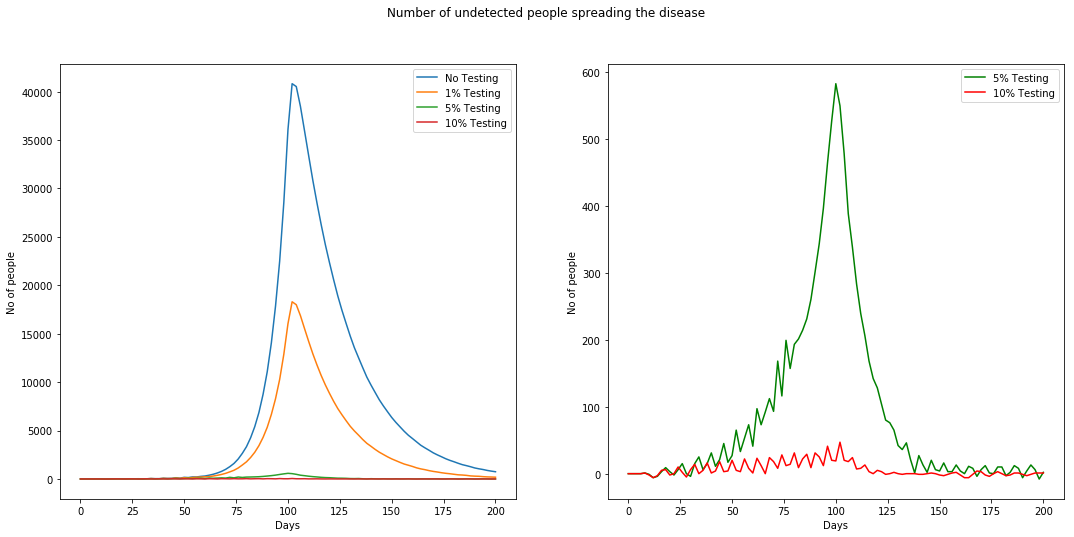

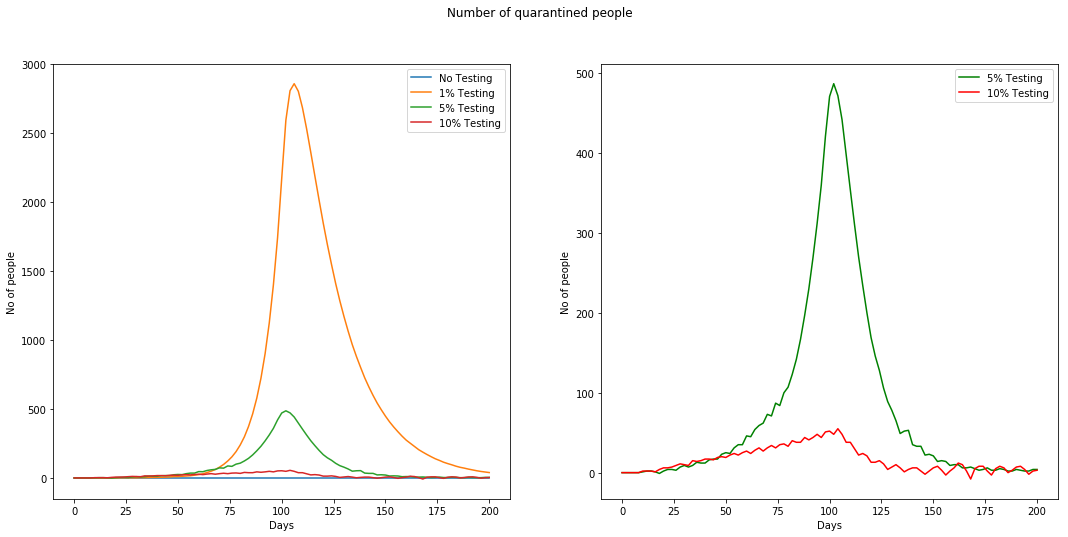

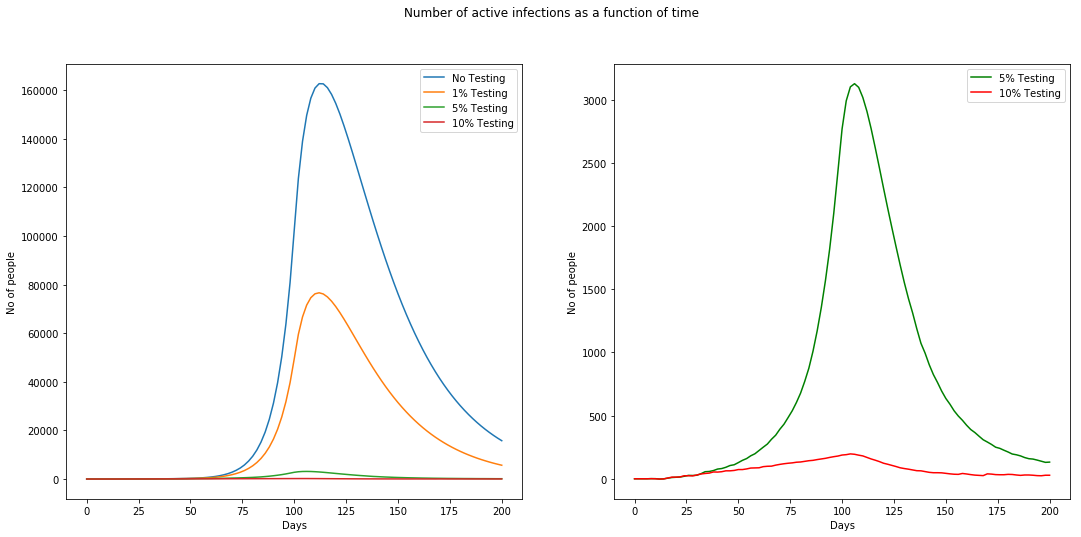

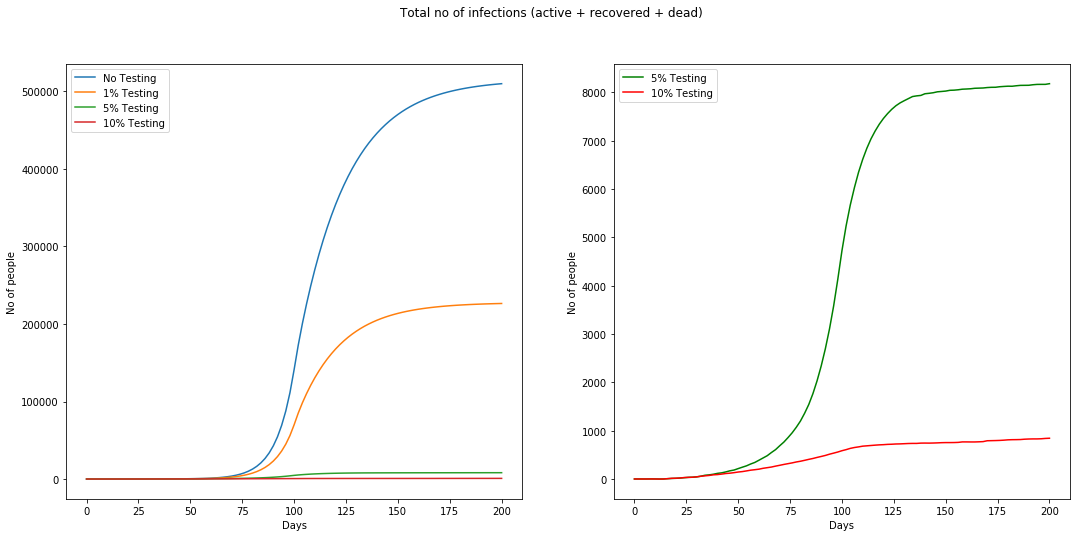

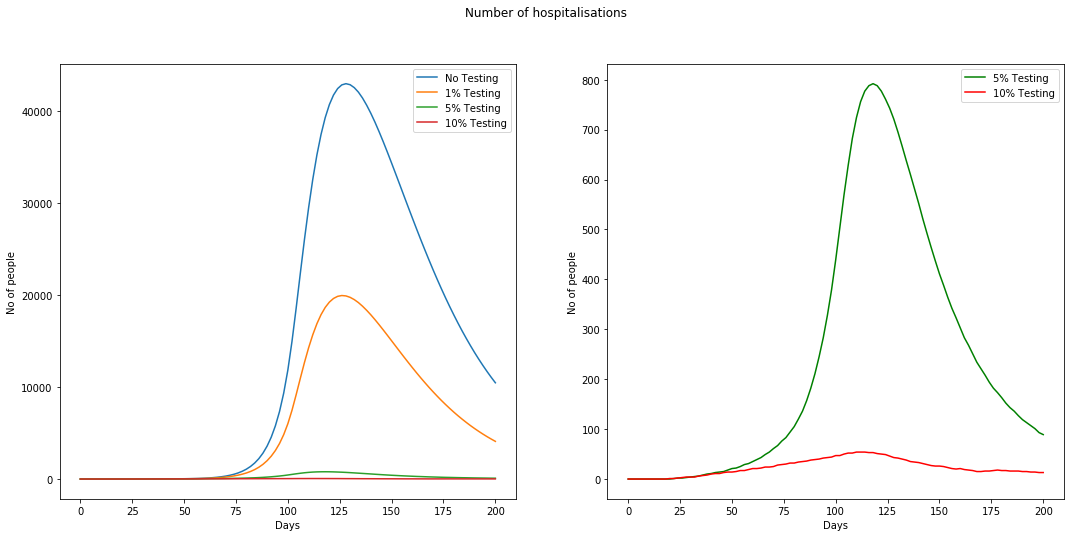

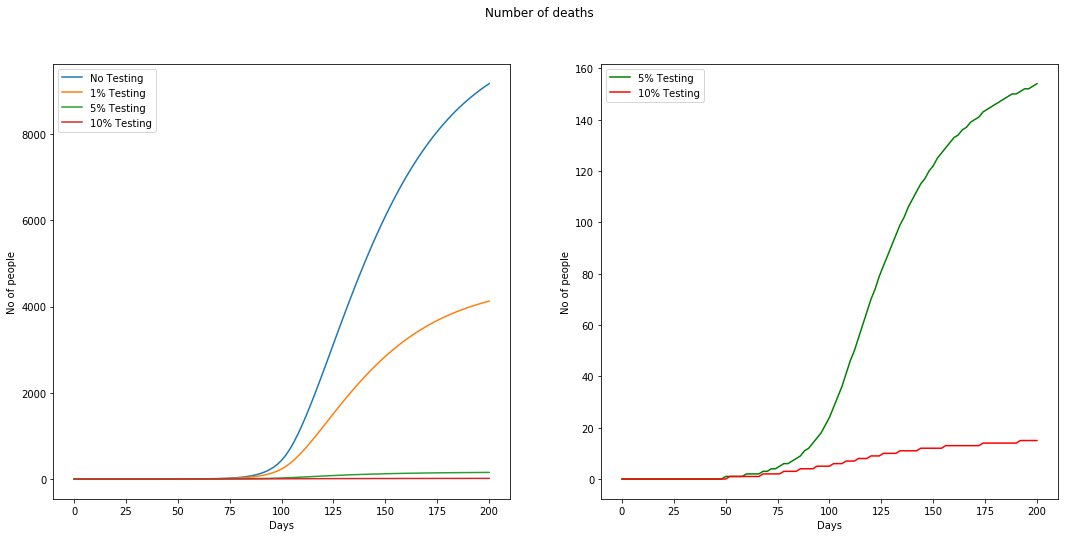

In [7]:
ind = sol_0.t
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(ind, states_int_array_0[2], label='No Testing')
plt.plot(ind, states_int_array_001[2], label='1% Testing')
plt.plot(ind, states_int_array_005[2], label='5% Testing')
plt.plot(ind, states_int_array_01[2], label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.subplot(122)
plt.plot(ind, states_int_array_005[2], 'g-', label='5% Testing')
plt.plot(ind, states_int_array_01[2], 'r-', label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.suptitle("Number of undetected people spreading the disease")
plt.show()
# plt.savefig('../undetected.png')


plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(ind, states_int_array_0[3] + states_int_array_0[4], label='No Testing')
plt.plot(ind, states_int_array_001[3] + states_int_array_001[4], label='1% Testing')
plt.plot(ind, states_int_array_005[3] + states_int_array_005[4], label='5% Testing')
plt.plot(ind, states_int_array_01[3] + states_int_array_01[4], label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.subplot(122)
plt.plot(ind, states_int_array_005[3] + states_int_array_005[4], 'g-', label='5% Testing')
plt.plot(ind, states_int_array_01[3] + states_int_array_01[4], 'r-', label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.suptitle("Number of quarantined people")
plt.show()
# plt.savefig('../quarantined.png')

plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(ind, states_int_array_0[2] + states_int_array_0[4] + states_int_array_0[5] + 
         states_int_array_0[6] + states_int_array_0[7] + states_int_array_0[8], label='No Testing')
plt.plot(ind, states_int_array_001[2] + states_int_array_001[4] + states_int_array_001[5] + 
         states_int_array_001[6] + states_int_array_001[7] + states_int_array_001[8], label='1% Testing')
plt.plot(ind, states_int_array_005[2] + states_int_array_005[4] + states_int_array_005[5] + 
         states_int_array_005[6] + states_int_array_005[7] + states_int_array_005[8], label='5% Testing')
plt.plot(ind, states_int_array_01[2] + states_int_array_01[4] + states_int_array_01[5] + 
         states_int_array_01[6] + states_int_array_01[7] + states_int_array_01[8], label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.subplot(122)
plt.plot(ind, states_int_array_005[2] + states_int_array_005[4] + states_int_array_005[5] + 
         states_int_array_005[6] + states_int_array_005[7] + states_int_array_005[8], 'g-', label='5% Testing')
plt.plot(ind, states_int_array_01[2] + states_int_array_01[4] + states_int_array_01[5] + 
         states_int_array_01[6] + states_int_array_01[7] + states_int_array_01[8], 'r-', label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.suptitle("Number of active infections as a function of time")
plt.show()
# plt.savefig('../active-infections.png')

plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(ind, states_int_array_0[2] + states_int_array_0[4] + states_int_array_0[5] + 
         states_int_array_0[6] + states_int_array_0[7] + states_int_array_0[8] + 
         states_int_array_0[9] + states_int_array_0[10], label='No Testing')
plt.plot(ind, states_int_array_001[2] + states_int_array_001[4] + states_int_array_001[5] + 
         states_int_array_001[6] + states_int_array_001[7] + states_int_array_001[8] + 
         states_int_array_001[9] + states_int_array_001[10], label='1% Testing')
plt.plot(ind, states_int_array_005[2] + states_int_array_005[4] + states_int_array_005[5] + 
         states_int_array_005[6] + states_int_array_005[7] + states_int_array_005[8] + 
         states_int_array_005[9] + states_int_array_005[10], label='5% Testing')
plt.plot(ind, states_int_array_01[2] + states_int_array_01[4] + states_int_array_01[5] + 
         states_int_array_01[6] + states_int_array_01[7] + states_int_array_01[8] + 
         states_int_array_01[9] + states_int_array_01[10], label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.subplot(122)
plt.plot(ind, states_int_array_005[2] + states_int_array_005[4] + states_int_array_005[5] + 
         states_int_array_005[6] + states_int_array_005[7] + states_int_array_005[8] + 
         states_int_array_005[9] + states_int_array_005[10], 'g-', label='5% Testing')
plt.plot(ind, states_int_array_01[2] + states_int_array_01[4] + states_int_array_01[5] + 
         states_int_array_01[6] + states_int_array_01[7] + states_int_array_01[8] + 
         states_int_array_01[9] + states_int_array_01[10], 'r-', label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.suptitle("Total no of infections (active + recovered + dead)")
plt.show()
# plt.savefig('../total-infections.png')

plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(ind, states_int_array_0[7] + states_int_array_0[8], label='No Testing')
plt.plot(ind, states_int_array_001[7] + states_int_array_001[8], label='1% Testing')
plt.plot(ind, states_int_array_005[7] + states_int_array_005[8], label='5% Testing')
plt.plot(ind, states_int_array_01[7] + states_int_array_01[8], label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.subplot(122)
plt.plot(ind, states_int_array_005[7] + states_int_array_005[8], 'g-', label='5% Testing')
plt.plot(ind, states_int_array_01[7] + states_int_array_01[8], 'r-', label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.suptitle("Number of hospitalisations")
plt.show()
# plt.savefig('../hospitalisations.png')


plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.plot(ind, states_int_array_0[10], label='No Testing')
plt.plot(ind, states_int_array_001[10], label='1% Testing')
plt.plot(ind, states_int_array_005[10], label='5% Testing')
plt.plot(ind, states_int_array_01[10], label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.subplot(122)
plt.plot(ind, states_int_array_005[10], 'g-', label='5% Testing')
plt.plot(ind, states_int_array_01[10], 'r-', label='10% Testing')
plt.ylabel('No of people')
plt.xlabel('Days')
plt.legend()
plt.suptitle("Number of deaths")
plt.show()
# plt.savefig('../deaths.png')

In [10]:
def create_plots(sol, states_time_matrices, labels, savefig=False, filenames=None):
    ind = sol.t
    
    plt.figure(figsize=(12, 12))
    for i, states_time_matrix in enumerate(states_time_matrices):
        plt.plot(ind, states_time_matrix[2], label=labels[i])
    plt.ylabel('No of people')
    plt.xlabel('Days')
    plt.legend()
    plt.title("Number of undetected people spreading the disease")
    if not savefig:
        plt.show()
    else:
        plt.savefig('../{}'.format(filenames[0]))


    plt.figure(figsize=(12, 12))
    for i, states_time_matrix in enumerate(states_time_matrices):
        plt.plot(ind, states_time_matrix[3] + states_time_matrix[4], label=labels[i])
    plt.ylabel('No of people')
    plt.xlabel('Days')
    plt.legend()
    plt.title("Number of quarantined people")
    if not savefig:
        plt.show()
    else:
        plt.savefig('../{}'.format(filenames[1]))

    plt.figure(figsize=(12, 12))
    for i, states_time_matrix in enumerate(states_time_matrices):
        plt.plot(ind, states_time_matrix[2] + states_time_matrix[4] + states_time_matrix[5] + 
                 states_time_matrix[6] + states_time_matrix[7] + states_time_matrix[8], label=labels[i])
    plt.ylabel('No of people')
    plt.xlabel('Days')
    plt.legend()
    plt.suptitle("Number of active infections as a function of time")
    if not savefig:
        plt.show()
    else:
        plt.savefig('../{}'.format(filenames[2]))

    plt.figure(figsize=(12, 12))
    for i, states_time_matrix in enumerate(states_time_matrices):
        plt.plot(ind, states_time_matrix[2] + states_time_matrix[4] + states_time_matrix[5] + 
                 states_time_matrix[6] + states_time_matrix[7] + states_time_matrix[8] + 
                 states_time_matrix[9] + states_time_matrix[10], label=labels[i])
    plt.ylabel('No of people')
    plt.xlabel('Days')
    plt.legend()
    plt.title("Total No of infections (Active + Recovered + Dead)")
    if not savefig:
        plt.show()
    else:
        plt.savefig('../{}'.format(filenames[3]))

    plt.figure(figsize=(12, 12))
    for i, states_time_matrix in enumerate(states_time_matrices):
        plt.plot(ind, states_time_matrix[7] + states_time_matrix[8], label=labels[i])
    plt.ylabel('No of people')
    plt.xlabel('Days')
    plt.legend()
    plt.title("Number of hospitalisations")
    if not savefig:
        plt.show()
    else:
        plt.savefig('../{}'.format(filenames[4]))


    plt.figure(figsize=(12, 12))
    for i, states_time_matrix in enumerate(states_time_matrices):
        plt.plot(ind, states_time_matrix[10], label=labels[i])
    plt.ylabel('No of people')
    plt.xlabel('Days')
    plt.legend()
    plt.title("Number of deaths")
    plt.show()
    if not savefig:
        plt.show()
    else:
        plt.savefig('../{}'.format(filenames[5]))

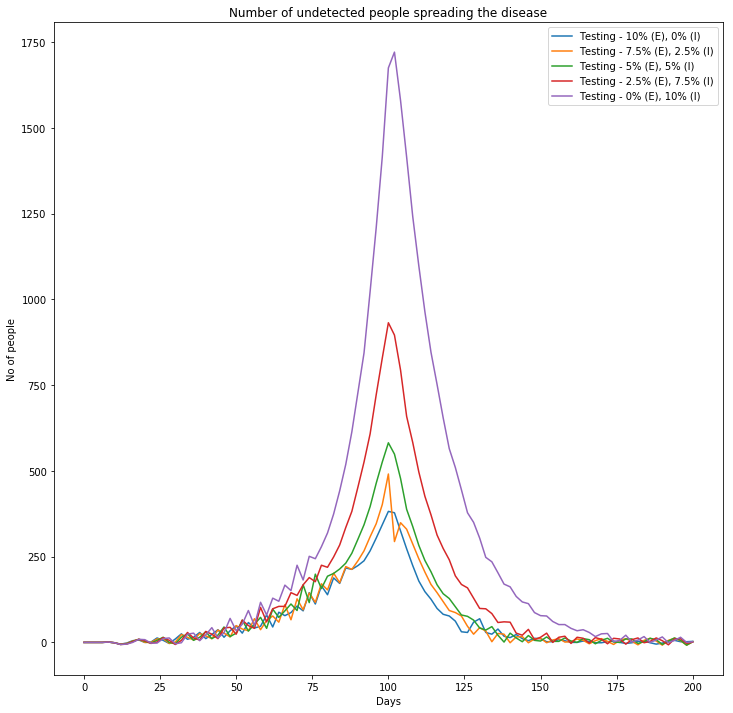

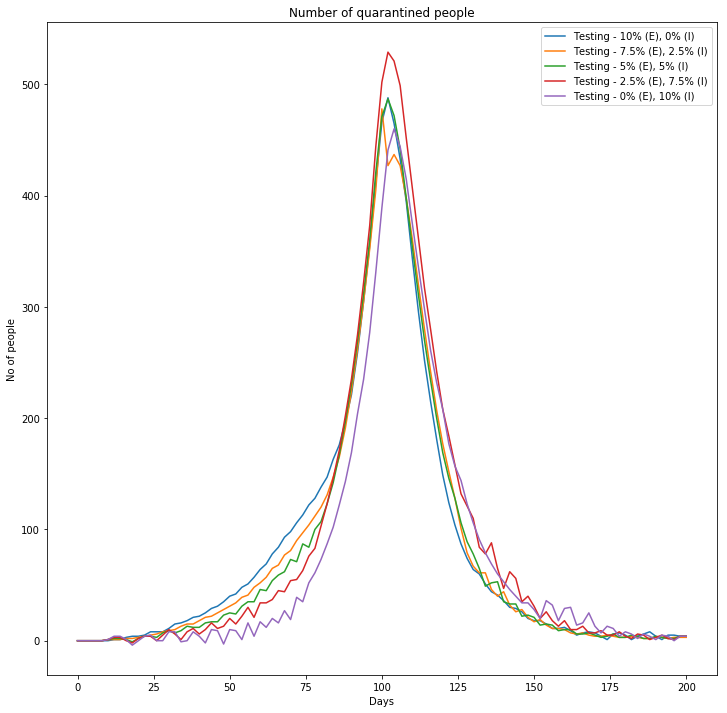

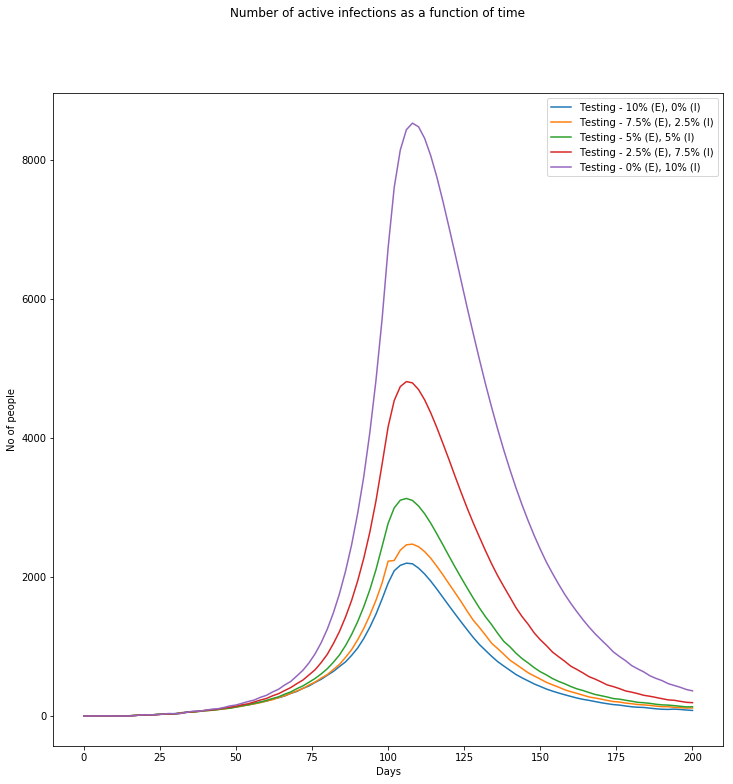

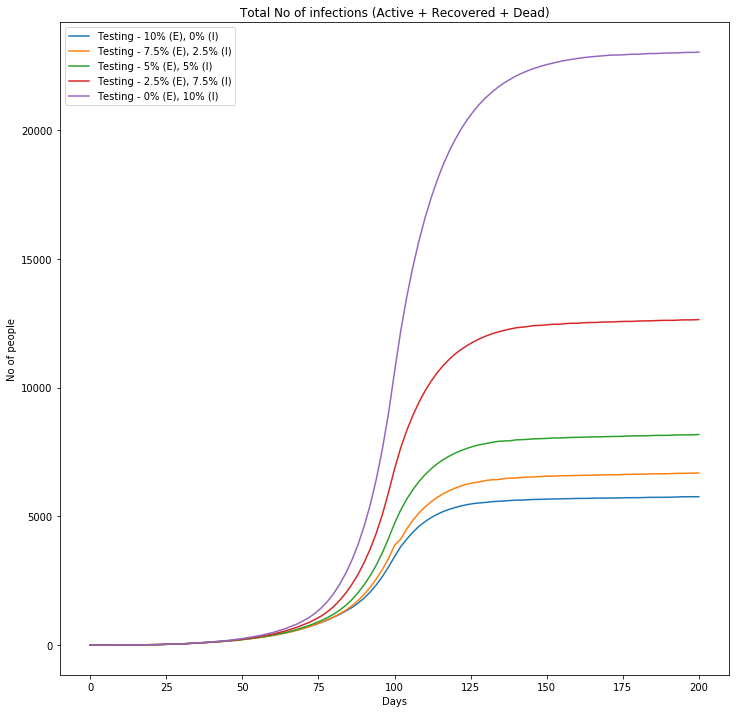

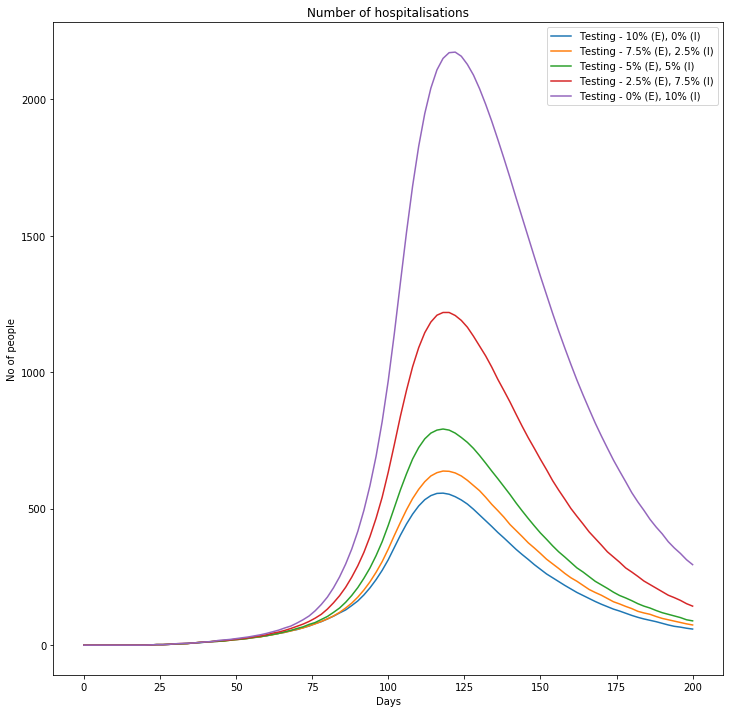

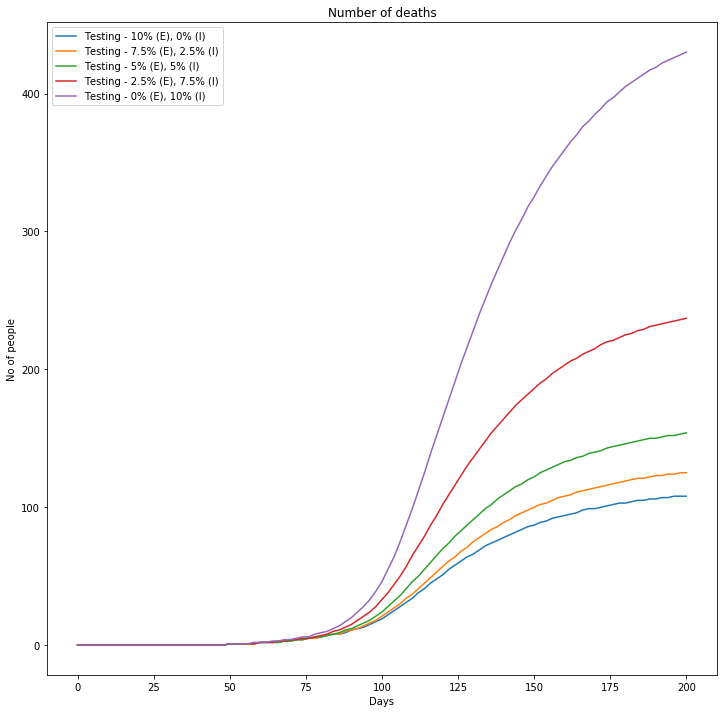

In [9]:
# Imperfecting Testing (How do the curves vary with decreasing sensitivity)

states_time_matrices = []
testing_params['testing_rate_for_exposed'] = 0.1
testing_params['testing_rate_for_infected'] = 0
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol = solver.solve_ode()
states_time_matrices.append( (sol.y*N).astype('int') )

testing_params['testing_rate_for_exposed'] = 0.075
testing_params['testing_rate_for_infected'] = 0.025
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol = solver.solve_ode()
states_time_matrices.append( (sol.y*N).astype('int') )

testing_params['testing_rate_for_exposed'] = 0.05
testing_params['testing_rate_for_infected'] = 0.05
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol = solver.solve_ode()
states_time_matrices.append( (sol.y*N).astype('int') )

testing_params['testing_rate_for_exposed'] = 0.025
testing_params['testing_rate_for_infected'] = 0.075
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol = solver.solve_ode()
states_time_matrices.append( (sol.y*N).astype('int') )

testing_params['testing_rate_for_exposed'] = 0
testing_params['testing_rate_for_infected'] = 0.1
solver = SEIR_Testing(vanilla_params, testing_params, state_init_values)
sol = solver.solve_ode()
states_time_matrices.append( (sol.y*N).astype('int') )

create_plots(sol, states_time_matrices, labels = ['Testing - 10% (E), 0% (I)', 'Testing - 7.5% (E), 2.5% (I)', 'Testing - 5% (E), 5% (I)',
                                                  'Testing - 2.5% (E), 7.5% (I)', 'Testing - 0% (E), 10% (I)'], savefig=False, filenames=None)


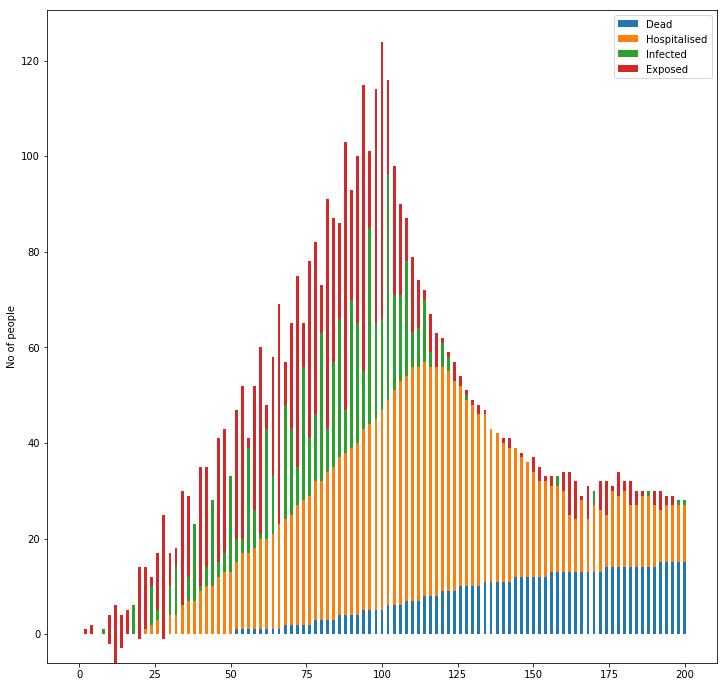

In [86]:
states_int_array = (sol.y*N).astype('int')
E = states_int_array[1]
I = states_int_array[2]
H = states_int_array[7]
F = states_int_array[-1]

ind = sol.t    # the x locations for the groups
width = 0.95        # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(12, 12))
p1 = plt.bar(ind, F, width)
p2 = plt.bar(ind, H, width, bottom=F)
p3 = plt.bar(ind, I, width, bottom=H+F)
p4 = plt.bar(ind, E, width, bottom=I+H+F)
plt.ylabel('No of people')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Dead', 'Hospitalised', 'Infected', 'Exposed'))

plt.show()